## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names)
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target


In [2]:
#check dataset head
df_wine[selected_features].head()

,alcohol,flavanoids,color_intensity,ash
0,14.23,3.06,5.64,2.43
1,13.20,2.76,4.38,2.14
2,13.16,3.24,5.68,2.67
3,14.37,3.49,7.80,2.50
4,13.24,2.69,4.32,2.87


### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

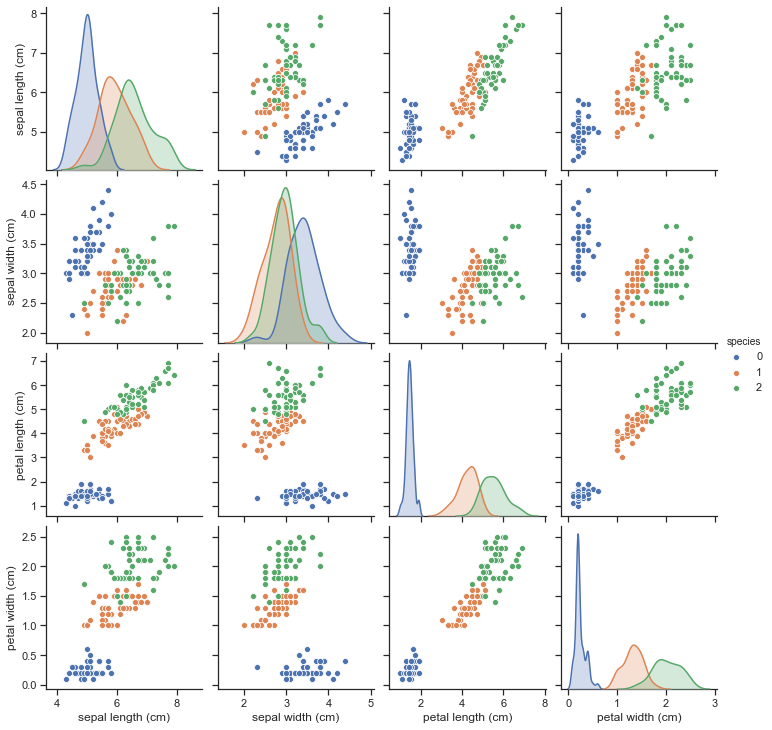

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [3]:
for key,value in wine.items():
    print(key,'\n',value,'\n')

data 
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] 

target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

frame 
 None 

target_names 
 ['class_0' 'class_1' 'class_2'] 

DESCR 
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in 

In [4]:
print('data.shape\t',wine['data'].shape,
      '\ntarget.shape \t',wine['target'].shape)

data.shape	 (178, 13) 
target.shape 	 (178,)


In [5]:
features = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data = features
data['target']=wine['target']
data['class']=data['target'].map(lambda ind: wine['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [6]:
#check dataset information
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

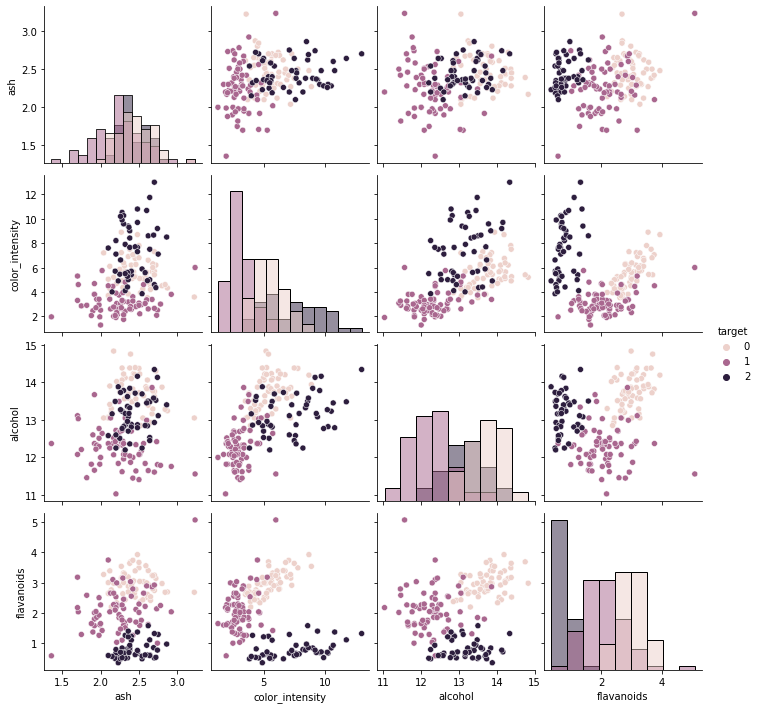

In [7]:
sns.pairplot(data, hue = "target", vars = ["ash", "color_intensity", "alcohol", "flavanoids"], diag_kind="hist")

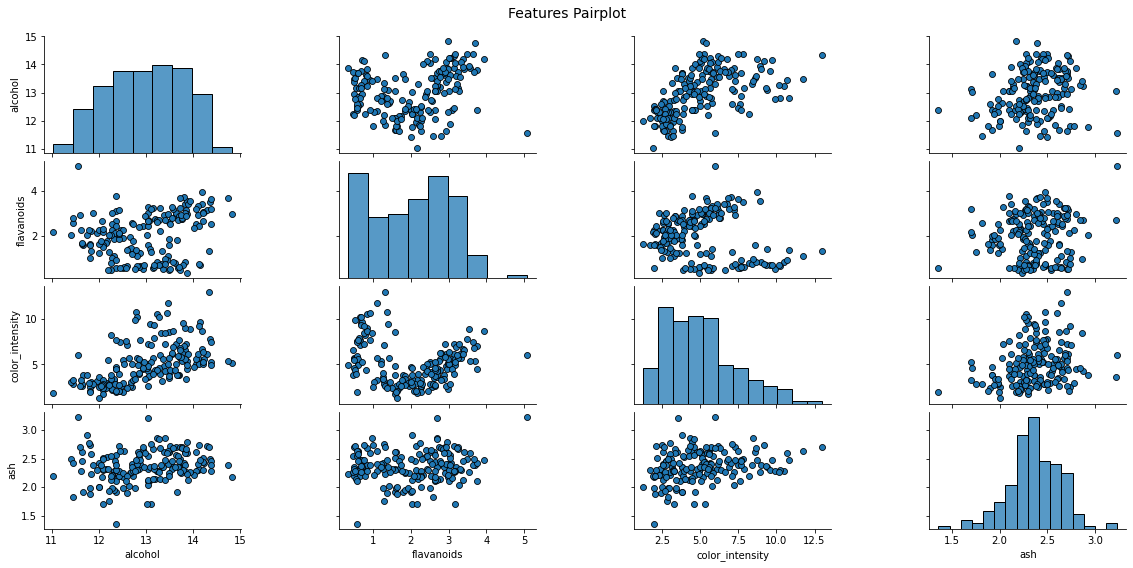

In [8]:
# define plotting function
pp = sns.pairplot(df_wine[selected_features], height=2,aspect=2,
                  plot_kws=dict(edgecolor="k", linewidth=0.8),
                  diag_kind="hist")
fig = pp.fig  
fig.subplots_adjust(top=0.93, wspace=0.5)
t = fig.suptitle('Features Pairplot', fontsize=14)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

In [9]:
# noise code
# initialize random seed to replicate results over different runs
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.6,X.shape)

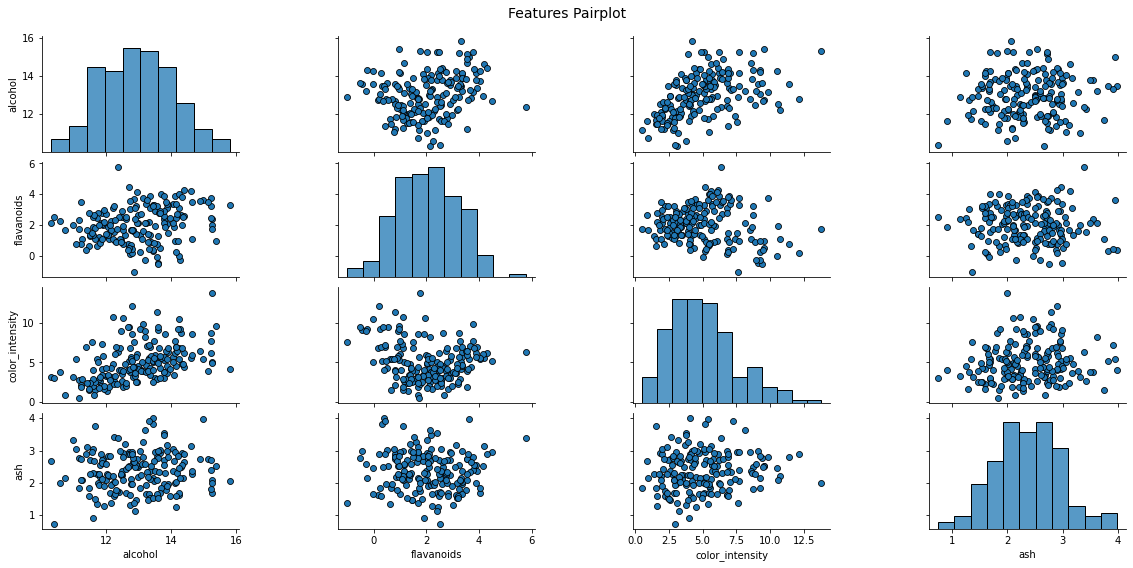

In [10]:
pp = sns.pairplot(df_wine[selected_features]+np.random.normal(0,0.6,X.shape), height=2,aspect=2,
                  plot_kws=dict(edgecolor="k", linewidth=0.8),
                  diag_kind="hist")
fig = pp.fig  
fig.subplots_adjust(top=0.93, wspace=0.5)
t = fig.suptitle('Features Pairplot', fontsize=14)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:
Color intensity & flavanoids are the two best features in predicting wine quality in the UCI Machine Learning Wine Recognition dataset. Given the subset of features of 4 parts, alcohol, flavonoids, colour intensity and ash, the two components with the tightest grouping of nearest neighbours are colour intensity and flavanoids. 
    


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer: The Gaussian noise code implemented randomness across all data points, preventing the future problem of memorized data instead of actual machine learning. It also further deepened the prior opinion on the two best features for wine classification, colour intensity and flavonoids, for predicting the target class of the wine. Since all data points added 'white-noise', this allowed further data exploration to ensure the two selected features were 'most-optimal'.




## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


## Helper functions KNN

In [11]:
features = X
target = y
#Calculates eucilidean distance 
def calcEuclidean(a, b):
    val_d = np.square(a - b) 
    val_d = np.sum(val_d) 
    val_d = np.sqrt(val_d)
    return val_d
#Calculates distance from all points 
def calc_dist_total_points(ex_point):
    d_vals = np.array([])
    for train_point in Xlearn:
        varDistance = calcEuclidean(ex_point, train_point)
        d_vals = np.append(d_vals, varDistance)
    return d_vals
#Splits dataset in train, and test dataset 
def splitData(features, target, ratioSplit = 0.2):
    allRows = features.shape[0]
    testSetSplit = np.round(allRows * ratioSplit) 
    splitR = np.random.randint(0, int(allRows), int(testSetSplit)) 
    featureVals = np.array([features[i] for i in splitR]) 
    trainSetSplit = np.delete(features, splitR, axis = 0) 
    targetVals = np.array([target[i] for i in splitR]) 
    trainSetTarget = np.delete(target, splitR, axis = 0) 

    return trainSetSplit, trainSetTarget, featureVals, targetVals
#Scales each element of columns to fit kNN model
def scaleFunc(feature_vals):
    total_cols = feature_vals.shape[1] 
    for i in range(total_cols): 
        cols = feature_vals[:, i]
        calcMean = cols.mean() 
        s = cols.std() 
        feature_vals[:, i] = (feature_vals[:, i] - calcMean) / s 
    return feature_vals

adj_array = scaleFunc(features)

#Split data
Xlearn, ylearn, Xpred, ypred = splitData(adj_array, target, ratioSplit = 0.2)


## Nearest neighbors classification function  

In [12]:
def kNNModel(trainSetSplit, trainSetTarget, featureVals, k = 5):
    Array_pred = np.array([])
    trainSetTarget = trainSetTarget.reshape(-1,1)
    for ex_point in featureVals: 
        d_vals = calc_dist_total_points(ex_point).reshape(-1,1) 
        nearestPoints = np.concatenate((d_vals, trainSetTarget), axis = 1)
        nearestPointsS = nearestPoints[nearestPoints[:, 0].argsort()] 
        nearestPointsK = nearestPointsS[:k] 
        numOccurance = np.unique(nearestPointsK[:, 1], return_counts=True)
        target_class = numOccurance[0][numOccurance[1].argmax()] 
        Array_pred = np.append(Array_pred, target_class)
    return Array_pred

In [13]:
# mykNN model and predictions 
test_Array_pred = kNNModel(Xlearn, ylearn, Xpred, k = 5)
test_Array_pred

array([0., 1., 1., 0., 0., 0., 0., 2., 2., 2., 1., 1., 0., 0., 1., 0., 2.,
       1., 1., 0., 0., 1., 1., 1., 2., 1., 0., 1., 0., 0., 0., 1., 2., 2.,
       2., 0.])

## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [14]:
#Accuracy function
def calcAcc(ypred, y_):
    sumTrue = 0
    for i in range(len(ypred)):
        if int(ypred[i]) == int(y_[i]):
            sumTrue += 1
    acc = sumTrue/len(ypred)
    return acc
    
#Contingency Matrix 
df = pd.DataFrame(test_Array_pred)
df['Array_pred'] = df[0]
df.drop(0, axis=1, inplace=True)
df['actual'] = ypred.tolist()
print(df)
contingency_matrix = pd.crosstab(df['Array_pred'], df['actual'])

    Array_pred  actual
0          0.0       0
1          1.0       1
2          1.0       1
3          0.0       0
4          0.0       0
5          0.0       0
6          0.0       1
7          2.0       2
8          2.0       2
9          2.0       2
10         1.0       1
11         1.0       1
12         0.0       0
13         0.0       0
14         1.0       1
15         0.0       0
16         2.0       2
17         1.0       1
18         1.0       1
19         0.0       0
20         0.0       0
21         1.0       1
22         1.0       1
23         1.0       1
24         2.0       2
25         1.0       1
26         0.0       1
27         1.0       1
28         0.0       0
29         0.0       0
30         0.0       0
31         1.0       1
32         2.0       2
33         2.0       2
34         2.0       2
35         0.0       0


Model accuracy  =  94.44444444444444


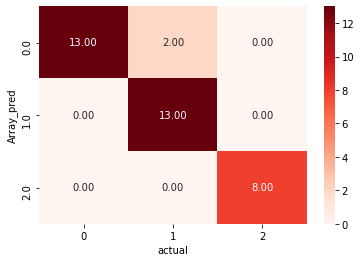

In [15]:
# test evaluation code
acc = calcAcc(ypred, test_Array_pred)
print('Model accuracy  = ', acc*100)
#Contingency matrix 
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix, annot=True, fmt='.2f', cmap="Reds", cbar=True)
plt.show()


## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [16]:
#Fold Two Dataset
X_twolearn = np.concatenate((features[:30], features[60:]))
Y_twolearn = np.concatenate((target[:30], target[60:]))
X_twopred  = features[30:60]
Y_twopred = target[30:60]
#Fold Three Dataset
X_threelearn = np.concatenate((features[:60], features[90:]))
Y_threelearn = np.concatenate((target[:60], target[90:]))
X_threepred  = features[60:90]
Y_threepred = target[60:90]
#Fold Four Dataset
X_fourlearn = np.concatenate((features[:90], features[120:]))
Y_fourlearn = np.concatenate((target[:90], target[120:]))
X_fourpred  = features[90:120]
Y_fourpred = target[90:120]
#Fold Five Dataset 
X_fivelearn = np.concatenate((features[:120], features[150:]))
Y_fivelearn = np.concatenate((target[:120], target[150:]))
X_fivepred  = features[120:150]
Y_fivepred = target[120:150]

In [17]:
#KNN Fold Two
test_twoArray_pred = kNNModel(X_twolearn, Y_twolearn, X_twopred, k = 5)
test_twoArray_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [18]:
#KNN Fold Three
test_threeArray_pred = kNNModel(X_threelearn, Y_threelearn, X_threepred, k = 5)
test_threeArray_pred

array([1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 2., 1., 1., 1., 1., 1., 1.])

In [19]:
#KNN Fold Four
test_fourArray_pred = kNNModel(X_fourlearn, Y_fourlearn, X_fourpred, k = 5)
test_fourArray_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
#KNN Fold Five
test_fiveArray_pred = kNNModel(X_fivelearn, Y_fivelearn, X_fivepred, k = 5)
test_fiveArray_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2.])

# evaluate clean data code

In [21]:
#Accuracy of Fold One DataSet
print('Model Accuracy fold One  = ', acc*100)
#Accuracy of Fold Two DataSet
acctwo = calcAcc(Y_twopred, test_twoArray_pred)
print('Model accuracy fold Two  = ', acctwo*100)
#Accuracy of Fold Three DataSet
accthree = calcAcc(Y_threepred, test_threeArray_pred)
print('Model accuracy fold Three  = ', accthree*100)
#Accuracy of Fold Four DataSet
accfour = calcAcc(Y_fourpred, test_fourArray_pred)
print('Model accuracy fold Four  = ', accfour*100)
#Accuracy of Fold Five DataSet
accfive = calcAcc(Y_fivepred, test_fiveArray_pred)
print('Model accuracy fold Five  = ', accfive*100)

Model Accuracy fold One  =  94.44444444444444
Model accuracy fold Two  =  86.66666666666667
Model accuracy fold Three  =  63.33333333333333
Model accuracy fold Four  =  93.33333333333333
Model accuracy fold Five  =  50.0


# evaluate noisy  data code

In [22]:
# step-1: Label X and y data arrays
features_Noisey = XN
target_Noisey = y
#Fold ONE NOISEY Dataset
Xlearn_N = np.concatenate((features_Noisey[:0], features_Noisey[30:]))
Ylearn_N = target_Noisey[30:]
Xpred_N  = features_Noisey[0:30]
Ypred_N = target_Noisey[0:30]
#Fold TWO NOISEY Dataset
X_twolearn_N = np.concatenate((features_Noisey[:30], features_Noisey[60:]))
Y_twolearn_N = np.concatenate((target_Noisey[:30], target_Noisey[60:]))
X_twopred_N  = features_Noisey[30:60]
Y_twopred_N = target_Noisey[30:60]
#Fold THREE NOISEY Dataset
X_threelearn_N = np.concatenate((features_Noisey[:60], features_Noisey[90:]))
Y_threelearn_N = np.concatenate((target_Noisey[:60], target_Noisey[90:]))
X_threepred_N  = features_Noisey[60:90]
Y_threepred_N = target_Noisey[60:90]
#Fold FOUR NOISEY Dataset
X_fourlearn_N = np.concatenate((features_Noisey[:90], features_Noisey[120:]))
Y_fourlearn_N = np.concatenate((target_Noisey[:90], target_Noisey[120:]))
X_fourpred_N  = features_Noisey[90:120]
Y_fourpred_N = target_Noisey[90:120]
#Fold FIVE NOISEY Dataset
X_fivelearn_N = np.concatenate((features_Noisey[:120], features_Noisey[150:]))
Y_fivelearn_N = np.concatenate((target_Noisey[:120], target_Noisey[150:]))
X_fivepred_N  = features_Noisey[120:150]
Y_fivepred_N = target_Noisey[120:150]

In [23]:
#FOLD ONE NOISEY KNN
test_Array_pred_N = kNNModel(Xlearn_N, Ylearn_N, Xpred_N, k = 5)
test_Array_pred_N

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
#KNN Fold Two NOISEY KNN
test_twoArray_pred_N = kNNModel(X_twolearn_N, Y_twolearn_N, X_twopred_N, k = 5)
test_twoArray_pred_N

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
#KNN Fold THREE NOISEY KNN
test_threeArray_pred_N = kNNModel(X_threelearn_N, Y_threelearn_N, X_threepred_N, k = 7)
test_threeArray_pred_N

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
#KNN Fold FOUR NOISEY KNN
test_fourArray_pred_N = kNNModel(X_fourlearn_N, Y_fourlearn_N, X_fourpred_N, k = 2)
test_fourArray_pred_N

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
#KNN Fold FIVE NOISEY KNN
test_fiveArray_pred_N = kNNModel(X_fivelearn_N, Y_fivelearn_N, X_fivepred_N, k = 1)
test_fiveArray_pred_N

array([0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [28]:
# Print the summaries
acc_N = calcAcc(Ypred_N, test_Array_pred_N)
print('Model accfold ONE Noisey  = ', acc_N*100)
#Accuracy of Fold Two DataSet Noisey
acctwo_N = calcAcc(Y_twopred_N, test_twoArray_pred_N)
print('Model accuracy fold Two Noisey  = ', acctwo*100)
#Accuracy of Fold Three DataSet Noisey
accthree_N = calcAcc(Y_threepred_N, test_threeArray_pred_N)
print('Model accuracy fold Three Noisey = ', accthree_N*100)
#Accuracy of Fold Four DataSet Noisey
accfour_N = calcAcc(Y_fourpred_N, test_fourArray_pred_N)
print('Model accuracy fold Four Noisey  = ', accfour_N*100)
#Accuracy of Fold Five DataSet Noisey
accfive_N = calcAcc(Y_fivepred_N, test_fiveArray_pred_N)
print('Model accuracy fold Five Noisey= ', accfive_N*100)

Model accfold ONE Noisey  =  100.0
Model accuracy fold Two Noisey  =  86.66666666666667
Model accuracy fold Three Noisey =  0.0
Model accuracy fold Four Noisey  =  0.0
Model accuracy fold Five Noisey=  66.66666666666666


In [29]:
total_predictions = np.concatenate(([test_Array_pred, test_twoArray_pred,test_threeArray_pred, test_fourArray_pred, test_fiveArray_pred]), axis=0)
total_actual = np.concatenate(([ypred, Y_twopred,Y_threepred,Y_fourpred,Y_fivepred]), axis=0 )

#create dataframe for all folds in regular dataset
newdf = pd.DataFrame(total_predictions)
newdf['total predictions'] = newdf[0]
newdf.drop(0, axis=1, inplace=True)
newdf['total actual'] = total_actual.tolist()
print(newdf)

#Create single array of all folds for noisey dataset
total_predictions_N = np.concatenate(([test_Array_pred_N, test_twoArray_pred_N, test_threeArray_pred_N, test_fourArray_pred_N, test_fiveArray_pred]), axis=0)
total_actual_N = np.concatenate(([Ypred_N, Y_twopred_N,Y_threepred_N,Y_fourpred_N,Y_fivepred_N]), axis=0)

#Create dataframe for all folds in noisey dataset
newdf_N = pd.DataFrame(total_predictions_N)
newdf_N['total predictions Noisey'] = newdf_N[0]
newdf_N.drop(0, axis=1, inplace=True)
newdf_N['total actual Noisey'] = total_actual_N.tolist()
print(newdf_N)

     total predictions  total actual
0                  0.0             0
1                  1.0             1
2                  1.0             1
3                  0.0             0
4                  0.0             0
..                 ...           ...
151                1.0             2
152                1.0             2
153                2.0             2
154                2.0             2
155                2.0             2

[156 rows x 2 columns]
     total predictions Noisey  total actual Noisey
0                         0.0                    0
1                         0.0                    0
2                         0.0                    0
3                         0.0                    0
4                         0.0                    0
..                        ...                  ...
145                       1.0                    2
146                       1.0                    2
147                       2.0                    2
148                   

## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


In [30]:
d = calc_dist_total_points(features) 

In [31]:
for i in range(0, len(d)):
    sum = 0
    sum = sum + d[i];

print('CLEAN STATS')
print('Model accuracy fold One  = ', acc*100)
print ('K  = 5')    
print('d =', sum / len(d))
print('Model accuracy fold Two  = ', acctwo*100)
print ('K  = 5')
print('d =', sum / len(d))
print('Model accuracy fold Three  = ', accthree*100)
print ('K  = 5')
print('d =', sum / len(d))
print('Model accuracy fold Four  = ', accfour*100)
print ('K  = 5')
print('d =', sum / len(d))
print('Model accuracy fold Five  = ', accfive*100)
print ('K  = 5')
print('d =', sum / len(d))
sum = (acc * 100 + acctwo * 100 + accthree * 100 + accfour * 100 + accfive * 100) / 5 
print ('Model accuracy Total Accuracy  = ', sum)
print('d =', sum / len(d))
print('----------------------------------------------------------------------')
print('NOISEY STATS')
print('Model accuracy fold One Noisey  = ', acc_N*100)
print ('K  = 5')
print('d =', sum / len(d))
print('Model accuracy fold Two Noisey   = ', acctwo_N*100)
print ('K  = 5')
print('d =', sum / len(d))
print('Model accuracy fold Three Noisey  = ', accthree_N*100)
print ('K  = 7')
print('d =', sum / len(d))
print('Model accuracy fold Four Noisey = ', accfour_N*100)
print ('K  = 2')
print('d =', sum / len(d))
print('Model accuracy fold Five Noisey = ', accfive_N*100)
print ('K  = 1')
print('d =', sum / len(d))
sum = (acc_N * 100 + acctwo_N * 100 + accthree_N * 100 + accfour_N * 100 + accfive_N * 100) / 5 
print ('Model accuracy Total Accuracy Noisey  = ', sum)
print('d =', sum / len(d))

CLEAN STATS
Model accuracy fold One  =  94.44444444444444
K  = 5
d = 0.2741084826188556
Model accuracy fold Two  =  86.66666666666667
K  = 5
d = 0.2741084826188556
Model accuracy fold Three  =  63.33333333333333
K  = 5
d = 0.2741084826188556
Model accuracy fold Four  =  93.33333333333333
K  = 5
d = 0.2741084826188556
Model accuracy fold Five  =  50.0
K  = 5
d = 0.2741084826188556
Model accuracy Total Accuracy  =  77.55555555555556
d = 0.524024024024024
----------------------------------------------------------------------
NOISEY STATS
Model accuracy fold One Noisey  =  100.0
K  = 5
d = 0.524024024024024
Model accuracy fold Two Noisey   =  96.66666666666667
K  = 5
d = 0.524024024024024
Model accuracy fold Three Noisey  =  0.0
K  = 7
d = 0.524024024024024
Model accuracy fold Four Noisey =  0.0
K  = 2
d = 0.524024024024024
Model accuracy fold Five Noisey =  66.66666666666666
K  = 1
d = 0.524024024024024
Model accuracy Total Accuracy Noisey  =  52.66666666666667
d = 0.3558558558558559


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [32]:
contingency_matrix_total = pd.crosstab(newdf['total predictions'], newdf['total actual'])
contingency_matrix_total_N = pd.crosstab(newdf_N['total predictions Noisey'], newdf_N['total actual Noisey'])

CLEAN


/home/sapientex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


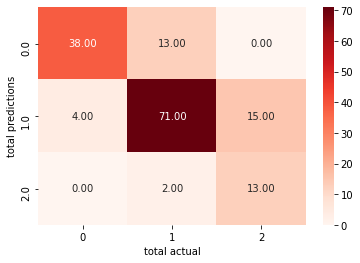

NOISY


/home/sapientex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


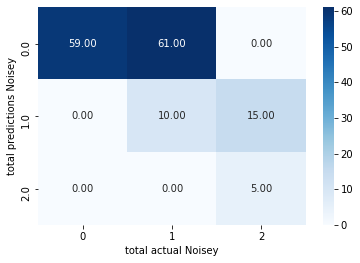

In [33]:
print('CLEAN')
# clean data summary results
#Contingency matrix Total
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix_total, annot=True, fmt='.2f', cmap="Reds", cbar=True)
plt.show()
print('NOISY')
# clean data summary results
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix_total_N, annot=True, fmt='.2f', cmap="Blues", cbar=True)
plt.show()

## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer: Parameter choice is not the same where there are different data used. The parameter values need fine-tuning to each dataset to have the best prediction outcome. Some folds of the data scored 0% accuracy using the same K values in the standard dataset regarding the noisy code. Due to the added randomness in the noisy dataset, other parameters are more effective in identifying the correct target value. 



### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer: NOT ANSWERED 





### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer: New consideration would consider which features are most important in identifying the target value. It would begin with a similar step in creating a pair plot to identify which feature best predicts the target value. Then take the highest valued features, implement kNN and fine-tune the parameters to ensure the highest model accuracy. Many steps are similar, but it would take special consideration of which features in the new dataset best predict the target value. The breast cancer dataset would have a different contingency matrix of true-positive, false-positives, true-negative, and false-negative. Specifically, the code for the contingency matrix would change. The precision and recall stats would be added to the new project since containing a four-square contingency matrix. 
